In [9]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# 作業フォルダへの移動を行います。
# 人によって作業場所がことなるので、その場合作業場所を変更してください。
import os 
os.chdir('/content/drive/MyDrive/Colab Notebooks/python実践データ分析100本ノック/100knock-data_analytics/3章') #ここを変更。

# 3章 顧客の全体像を把握する１０本ノック

ここでは、スポーツジムの会員データを使って顧客の行動を分析していきます。  
これまでと同様にまずはデータを理解し、加工した後、  
顧客の行動データを分析していきましょう。  
ここでは、機械学習に向けての初期分析を行います。

### ノック21：データを読み込んで把握しよう

In [11]:
import pandas as pd
import numpy as np

In [12]:
campaign_master = pd.read_csv('campaign_master.csv')
class_master = pd.read_csv('class_master.csv')
customer_master = pd.read_csv('customer_master.csv')
use_log = pd.read_csv('use_log.csv')

In [13]:
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [14]:
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [15]:
print(len(customer_master))
customer_master.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [16]:
print(len(use_log))
use_log.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


### ノック22：顧客データを整形しよう

In [23]:
merge_data = pd.merge(customer_master, class_master, on = 'class', how = 'left')
merge_data = pd.merge(merge_data, campaign_master, on = 'campaign_id', how = 'left')

In [24]:
merge_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [25]:
print(len(customer_master))
print(len(merge_data))

4192
4192


In [26]:
merge_data.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

### ノック23：顧客データの基礎集計をしよう

In [27]:
merge_data.groupby('class_name').count()['customer_id']

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [29]:
merge_data.groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [30]:
merge_data.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [31]:
merge_data.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [32]:
merge_data['start_date'] = pd.to_datetime(merge_data['start_date'])
customer_start = merge_data.loc[merge_data['start_date'] > pd.to_datetime('20180401')]
print(len(customer_start))

1361


### ノック24：最新顧客データの基礎集計をしよう

In [33]:
merge_data['end_date'] = pd.to_datetime(merge_data['end_date'])
customer_newer = merge_data.loc[(merge_data['end_date'] >= pd.to_datetime('20190331'))|(merge_data['end_date'].isna())]

In [34]:
print(len(customer_newer))
customer_newer['end_date'].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [35]:
customer_newer.groupby('class_name').count()['customer_id']

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [37]:
customer_newer.groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [38]:
customer_newer.groupby('gender').count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

### ノック25：利用履歴データを集計しよう

In [39]:
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [40]:
# usedateをdatetime型にし、月毎に集計
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
use_log['usemonth'] = use_log['usedate'].dt.strftime('%Y%m')
use_log_months = use_log.groupby(['usemonth', 'customer_id'], as_index=False).count()

In [41]:
use_log_months.rename(columns={'log_id':'count'}, inplace=True)
del use_log_months['usedate']
use_log_months.head()

,usemonth,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [42]:
# 顧客ごとに絞り込み、平均値、中央値、最大値、最小値を集計
uselog_customer = use_log_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


### ノック26：利用履歴データから定期利用フラグを作成しよう

---



顧客ごとに月/曜日別に集計を行い、最大値が4以上の曜日が1ヶ月でもあった場合フラグを１にする。


In [43]:
use_log.head()

,log_id,customer_id,usedate,usemonth
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [44]:
use_log['weekday'] = use_log['usedate'].dt.weekday
use_log.head()

,log_id,customer_id,usedate,usemonth,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


In [45]:
use_log_weekday = use_log.groupby(['customer_id', 'usemonth', 'weekday'], as_index=False).count()[['customer_id', 'usemonth', 'weekday', 'log_id']]
use_log_weekday.rename(columns={'log_id': 'count'}, inplace=True)
use_log_weekday.head()

,customer_id,usemonth,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [46]:
use_log_weekday = use_log_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]
use_log_weekday['routine_flg'] = 0

In [47]:
use_log_weekday['routine_flg'] = use_log_weekday['routine_flg'].where(use_log_weekday['count'] < 4, 1)
use_log_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [48]:
use_log_weekday['routine_flg'].value_counts()

1    3413
0     779
Name: routine_flg, dtype: int64

### ノック27：顧客データと利用履歴データを結合しよう

In [49]:
merge_data = pd.merge(merge_data, uselog_customer, on = 'customer_id', how='left')
merge_data = pd.merge(merge_data, use_log_weekday, on = 'customer_id', how='left')

In [50]:
merge_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,4,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,5,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,5,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,5,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,5,1


### ノック28：会員期間を計算しよう

In [54]:
from dateutil.relativedelta import relativedelta
merge_data['calc_data'] = merge_data['end_date']
merge_data['calc_data'] = merge_data['calc_data'].fillna(pd.to_datetime('20190430'))
merge_data['membership_period'] = 0
for i in range(len(merge_data)):
  delta = relativedelta(merge_data['calc_data'].iloc[i], merge_data['start_date'].iloc[i])
  merge_data['membership_period'].iloc[i] = delta.years*12 + delta.months
merge_data.head()

<ipython-input-54-a813b410b1c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data['membership_period'].iloc[i] = delta.years*12 + delta.months


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flg,calc_data,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,4,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,5,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,5,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,5,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,5,1,2019-04-30,47


### ノック29：顧客行動の各種統計量を把握しよう

In [55]:
merge_data[['mean', 'median', 'max', 'min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [56]:
merge_data['routine_flg'].value_counts()

1    3413
0     779
Name: routine_flg, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

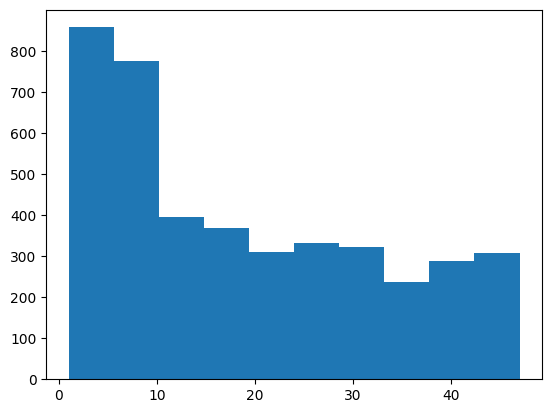

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(merge_data['membership_period'])

### ノック30：退会ユーザーと継続ユーザーの違いを把握しよう

In [59]:
customer_end = merge_data[merge_data['is_deleted'] == 1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,count,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,3.215556,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,1.217087,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,2.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,3.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,4.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,5.000000,1.000000,23.000000


In [60]:
customer_end = merge_data[merge_data['is_deleted'] != 1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,count,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,4.865588,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.406154,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,2.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,5.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,5.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,5.000000,1.000000,47.000000
